In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
zip_code_df = pd.read_csv('ny_rent_prediction_data_comprehensive.csv')

In [6]:
zip_code_df.head()

,Total Population,Median Age,Male Population,Female Population,White Alone,Black or African American Alone,Asian Alone,Hispanic or Latino,Number of Households,Median Household Income,...,Monthly Housing Costs,High School Graduate (Age 25+),Bachelor’s Degree (Age 25+),Graduate or Professional Degree (Age 25+),English Only,Spanish,Never Married,Currently Married,Divorced,zip code tabulation area
0,27004,35.7,12679,14325,15428,2355,5031,5206,14375,106509,...,2223,1137,8911,561,NaN,NaN,6670,3441,990,10001
1,76518,44.2,38211,38307,23951,6785,28590,19864,36028,43362,...,1176,8408,16087,616,NaN,NaN,16922,13439,2220,10002
2,53877,32.2,26251,27626,36515,2899,9023,5541,24987,152863,...,2621,1761,16265,2375,NaN,NaN,15872,6949,1109,10003
3,4579,34.6,2367,2212,2653,266,1419,229,2123,232543,...,4001,15,1588,128,NaN,NaN,814,1151,89,10004
4,8801,29.6,3861,4940,6233,421,985,755,4881,189886,...,4001,261,3870,181,NaN,NaN,2356,1220,121,10005


In [7]:
zip_code_df.describe()

,Total Population,Median Age,Male Population,Female Population,White Alone,Black or African American Alone,Asian Alone,Hispanic or Latino,Number of Households,Median Household Income,...,Monthly Housing Costs,High School Graduate (Age 25+),Bachelor’s Degree (Age 25+),Graduate or Professional Degree (Age 25+),English Only,Spanish,Never Married,Currently Married,Divorced,zip code tabulation area
count,139.000000,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,1.390000e+02,...,1.390000e+02,139.000000,139.000000,139.000000,0.0,0.0,139.000000,139.000000,139.000000,139.000000
mean,52217.165468,-1.918462e+07,25105.043165,27112.122302,20142.654676,11614.618705,7225.489209,15941.561151,20125.892086,-1.909903e+07,...,-1.918278e+07,7226.561151,8601.302158,603.561151,NaN,NaN,9524.323741,9186.985612,1299.064748,10698.223022
std,28051.001582,1.118558e+08,13471.575991,14701.304653,15303.772693,16217.374379,9442.910104,15984.739127,10225.105949,1.118706e+08,...,1.118562e+08,5654.249355,5157.180341,676.694653,NaN,NaN,5377.290633,5329.110763,743.429589,555.099417
min,0.000000,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.666667e+08,...,-6.666667e+08,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,10001.000000
25%,30502.500000,3.465000e+01,15161.500000,15810.500000,8471.500000,1323.500000,1424.500000,5709.500000,12785.500000,5.680300e+04,...,1.550000e+03,2528.500000,4680.000000,157.000000,NaN,NaN,5575.000000,5424.500000,727.000000,10037.500000
50%,50319.000000,3.750000e+01,23411.000000,25781.000000,15428.000000,4222.000000,3997.000000,9321.000000,19872.000000,7.760000e+04,...,1.773000e+03,6228.000000,7842.000000,398.000000,NaN,NaN,8916.000000,8582.000000,1340.000000,10469.000000
75%,75413.000000,4.150000e+01,35870.000000,39117.000000,27212.500000,16268.000000,8878.500000,22269.000000,29263.500000,1.067125e+05,...,2.088000e+03,10885.000000,12263.500000,843.500000,NaN,NaN,13385.500000,12274.000000,1883.000000,11230.500000
max,112750.000000,5.190000e+01,59755.000000,56197.000000,64293.000000,81608.000000,57749.000000,85529.000000,41653.000000,2.500010e+05,...,4.001000e+03,30944.000000,20984.000000,4185.000000,NaN,NaN,23250.000000,22277.000000,3232.000000,11385.000000


In [8]:
zip_code_df.columns

Index(['Total Population', 'Median Age', 'Male Population',
       'Female Population', 'White Alone', 'Black or African American Alone',
       'Asian Alone', 'Hispanic or Latino', 'Number of Households',
       'Median Household Income', 'Per Capita Income',
       'Population Below Poverty Level', 'Employed', 'Unemployed',
       'Total Income Distribution', 'Median Gross Rent', 'Median Home Value',
       'Occupied Housing Units', 'Vacant Housing Units',
       'Owner-Occupied Units (value < $100,000)', 'Monthly Housing Costs',
       'High School Graduate (Age 25+)', 'Bachelor’s Degree (Age 25+)',
       'Graduate or Professional Degree (Age 25+)', 'English Only', 'Spanish',
       'Never Married', 'Currently Married', 'Divorced',
       'zip code tabulation area'],
      dtype='object')

In [15]:
all_listings = []

# Load each JSON file and combine listings into a list
for file in glob.glob('Scaper/scraped_data/*.json'):
    with open(file) as f:
        data = json.load(f)
        all_listings.extend(data['listResults'])
zillow_df = pd.DataFrame(all_listings)

In [16]:
zillow_df.head()

,zpid,id,rawHomeStatusCd,marketingStatusSimplifiedCd,providerListingId,imgSrc,hasImage,detailUrl,statusType,statusText,...,canSaveBuilding,availabilityCount,isInstantTourEnabled,isContactable,hasOpenHouse,openHouseStartDate,openHouseEndDate,openHouseDescription,streetViewURL,streetViewMetadataURL
0,345131975,345131975,ForRent,For Rent,5eqtcyy0n70se,https://photos.zillowstatic.com/fp/5eeb8afc0be...,True,https://www.zillow.com/apartments/getzville-ny...,FOR_RENT,Apartment for rent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2079034973,2079034973,ForRent,For Rent,2hh680bv1mawm,https://photos.zillowstatic.com/fp/2736ccef5ac...,True,https://www.zillow.com/apartments/getzville-ny...,FOR_RENT,Apartment for rent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2060404202,2060404202,ForRent,For Rent,kt7f87gmwmr6,https://photos.zillowstatic.com/fp/3b90cdde69c...,True,https://www.zillow.com/homedetails/212-Sunshin...,FOR_RENT,Apartment for rent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30237104,30237104,ForRent,For Rent,4d75cvthfdwg,https://photos.zillowstatic.com/fp/0b1868fd4e4...,True,https://www.zillow.com/homedetails/88-Brittany...,FOR_RENT,Apartment for rent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30242470,30242470,ForRent,For Rent,1z1xx7aq58jwr,https://photos.zillowstatic.com/fp/8ce5bc9eca2...,True,https://www.zillow.com/homedetails/270-Heim-Rd...,FOR_RENT,House for rent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
zillow_df.columns

In [21]:
# Convert both columns to string type
zillow_df['addressZipcode'] = zillow_df['addressZipcode'].astype(str)
zip_code_df['zip code tabulation area'] = zip_code_df['zip code tabulation area'].astype(str)

# Now merge
df = pd.merge(zillow_df, zip_code_df, 
              left_on='addressZipcode', 
              right_on='zip code tabulation area',
              how='left')

In [22]:
df.columns

Index(['zpid', 'id', 'rawHomeStatusCd', 'marketingStatusSimplifiedCd',
       'providerListingId', 'imgSrc', 'hasImage', 'detailUrl', 'statusType',
       'statusText', 'countryCurrency', 'price', 'unformattedPrice', 'address',
       'addressStreet', 'addressCity', 'addressState', 'addressZipcode',
       'isUndisclosedAddress', 'beds', 'baths', 'area', 'latLong',
       'isZillowOwned', 'variableData', 'hdpData', 'isSaved',
       'isUserClaimingOwner', 'isUserConfirmedClaim', 'pgapt', 'sgapt',
       'shouldShowZestimateAsPrice', 'has3DModel', 'hasVideo', 'isHomeRec',
       'hasAdditionalAttributions', 'isFeaturedListing', 'isShowcaseListing',
       'list', 'relaxed', 'brokerName', 'carouselPhotos',
       'marketingTreatments', 'rooms', 'badgeInfo', 'availabilityDate',
       'zestimate', 'units', 'lotId', 'buildingName', 'isBuilding',
       'canSaveBuilding', 'availabilityCount', 'isInstantTourEnabled',
       'isContactable', 'hasOpenHouse', 'openHouseStartDate',
       'openH

In [29]:
# Clean and preprocess the data
def clean_price(price_str):
    if isinstance(price_str, str):
        # Remove '$', '/', 'mo', and ',','+','C' characters and convert to float
        return float(price_str.replace('$', '').replace('/mo', '').replace(',', '').replace('+', '').replace('C',''))
    return price_str


In [30]:
# Clean price columns
df['price'] = df['price'].apply(clean_price)
df['Monthly Housing Costs'] = df['Monthly Housing Costs'].apply(clean_price)
df['Median Home Value'] = df['Median Home Value'].apply(clean_price)

## EDA

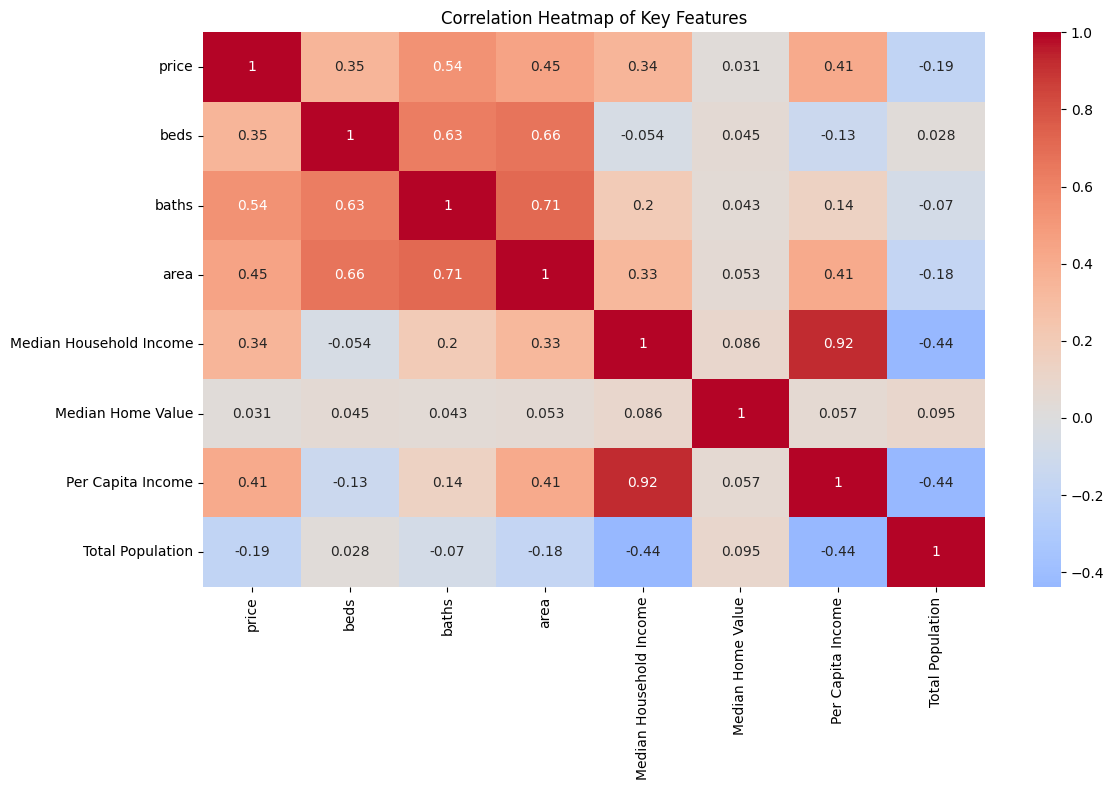

In [31]:
# 1. Correlation Heatmap for Key Features
features = ['price', 'beds', 'baths', 'area', 'Median Household Income', 
           'Median Home Value', 'Per Capita Income', 'Total Population']
plt.figure(figsize=(12, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.show()

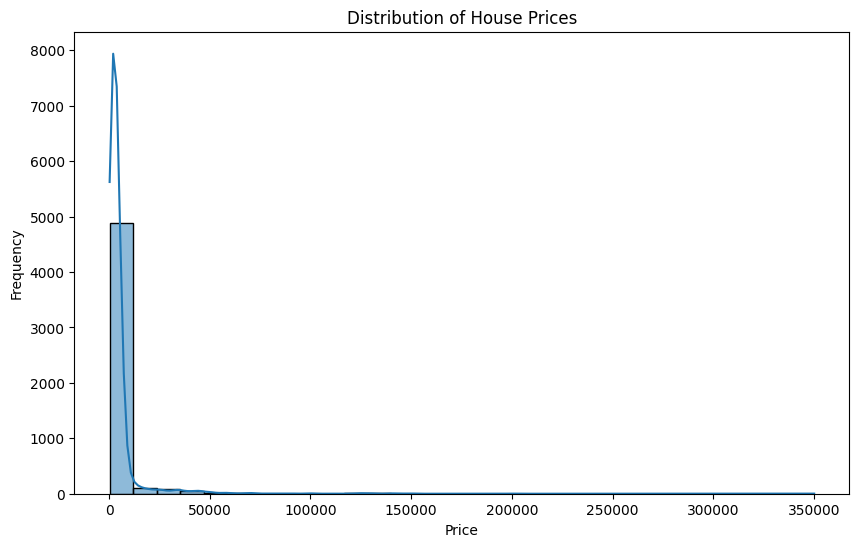

In [35]:
# most houses look to be lower than $50000
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


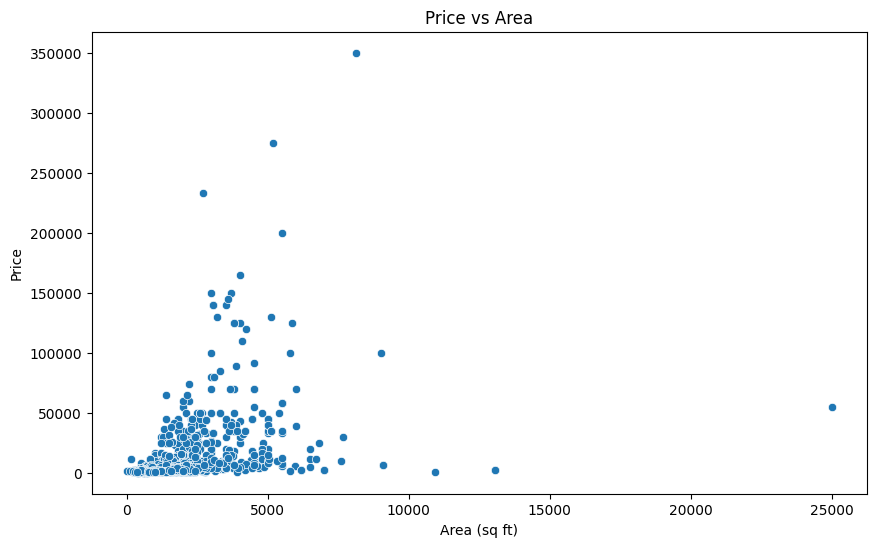

In [36]:
# Price vs Area scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.show()

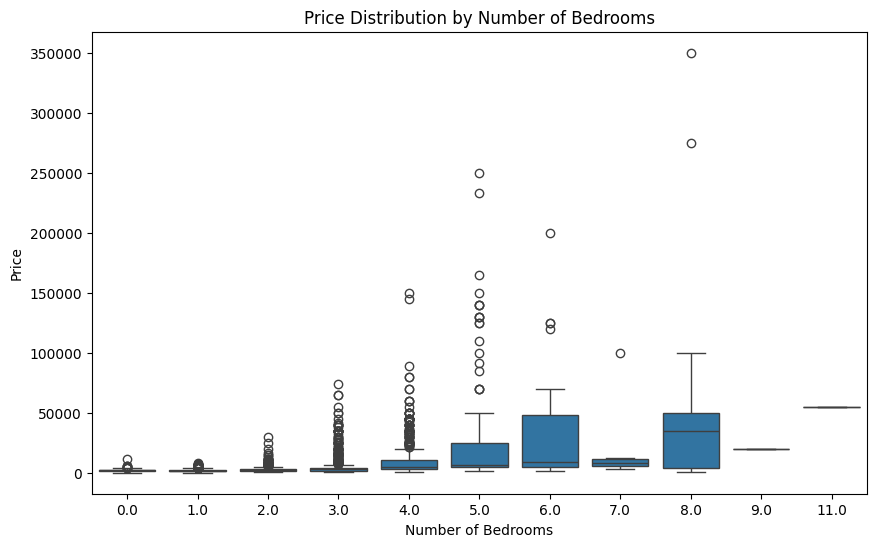

In [37]:
# Box plot of prices by number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='beds', y='price')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

## Train a simple model

In [45]:
df['price'].isnull().value_counts()
# 1532 null values

price
False    5186
True     1532
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

# Prepare features with log transformation for price
features = ['beds', 'baths', 'area', 'Median Household Income', 
           'Per Capita Income', 'Median Home Value', 'Total Population']
df = df[df['price'].isnull()==False]
X = df[features]
y = df['price']

# Log transform the target variable
pt = PowerTransformer(method='yeo-johnson')
y_transformed = pt.fit_transform(y.values.reshape(-1, 1)).ravel()

# Handle missing values
X = X.fillna(X.median())

# Use RobustScaler instead of StandardScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_transformed, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Transform predictions back to original scale
lr_pred = pt.inverse_transform(lr_model.predict(X_test).reshape(-1, 1)).ravel()
rf_pred = pt.inverse_transform(rf_model.predict(X_test).reshape(-1, 1)).ravel()
y_test_original = pt.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Calculate metrics
lr_rmse = mean_squared_error(y_test_original, lr_pred, squared=False)
rf_rmse = mean_squared_error(y_test_original, rf_pred, squared=False)

print(f'Linear Regression RMSE: ${lr_rmse:,.2f}')
print(f'Random Forest RMSE: ${rf_rmse:,.2f}')

Linear Regression RMSE: $10,992.22
Random Forest RMSE: $9,372.80


/Users/abhishekmahajan/Documents/projects/DSB_rental_price_prediction_project/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/abhishekmahajan/Documents/projects/DSB_rental_price_prediction_project/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
